In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Set the paths to train, validation, and test directories
train_dir = 'C:/Users/Sanket/OneDrive/Documents/Bald detection/Dataset/Train'
validation_dir = 'C:/Users/Sanket/OneDrive/Documents/Bald detection/Dataset/Validation'
test_dir = 'C:/Users/Sanket/OneDrive/Documents/Bald detection/Dataset/Test'

In [3]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

In [4]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [5]:
# Rescale validation and test images
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Generate batches of images for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 160000 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 22599 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [9]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Sanket\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Define callbacks
checkpoint = ModelCheckpoint("bald_classifier.keras", monitor='val_accuracy', verbose=1, save_best_only=True)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint])

Epoch 1/5


C:\Users\Sanket\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9757 - loss: 0.1096
Epoch 1: val_accuracy improved from -inf to 0.97920, saving model to bald_classifier.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10652s 2s/step - accuracy: 0.9757 - loss: 0.1096 - val_accuracy: 0.9792 - val_loss: 0.0712
Epoch 2/5

Epoch 2: val_accuracy improved from 0.97920 to 1.00000, saving model to bald_classifier.keras


C:\Users\Sanket\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1s 140us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9778 - loss: 0.0792
Epoch 3: val_accuracy did not improve from 1.00000
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9490s 2s/step - accuracy: 0.9778 - loss: 0.0792 - val_accuracy: 0.9792 - val_loss: 0.0538
Epoch 4/5

Epoch 4: val_accuracy did not improve from 1.00000
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0439
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9776 - loss: 0.0650
Epoch 5: val_accuracy did not improve from 1.00000
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9800s 2s/step - accuracy: 0.9776 - loss: 0.0650 - val_accuracy: 0.9793 - val_loss: 0.0468


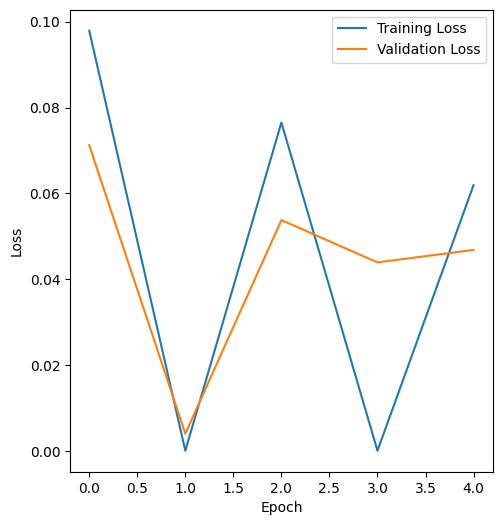

In [13]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

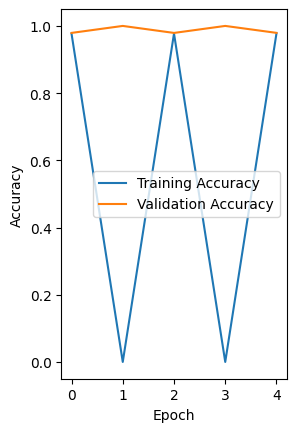

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
plt.show()

In [17]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model

model = load_model("bald_classifier.keras")  #bald_detection_model.h5

# Function to predict image
def predict_image():
    file_path = filedialog.askopenfilename()
    img = Image.open(file_path)
    img = img.resize((img_width, img_height))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction[0] < 0.5:
        result_label.config(text="Not Bald")
    else:
        result_label.config(text="Bald")

# Create Tkinter GUI window
root = tk.Tk()
root.title("Bald Classifier")

# Create a button to browse image
browse_button = tk.Button(root, text="Browse Image", command=predict_image)
browse_button.pack(pady=10)

# Create a label to display result
result_label = tk.Label(root, text="")
result_label.pack(pady=10)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
